# STUDYING ATP MATCHES FROM 2018-2021
https://www.kaggle.com/datasets/valentinfiorenza/tennis-data

## Exploratory Data Analysis

In [990]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import plotly.express as px

In [991]:
tennis = pd.read_csv('tennis_data.csv',low_memory=False)
tennis.head(5)

,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,...,pl1_flag,pl1_year_pro,pl1_weight,pl1_height,pl1_hand,pl2_flag,pl2_year_pro,pl2_weight,pl2_height,pl2_hand
0,1,Adelaide,Adelaide International 1,2022-01-03,ATP250,Outdoor,Hard,1st Round,3,Kwon S.W.,...,KOR,2015.0,72.0,180.0,Right-Handed,JPN,2014.0,64.0,170.0,Left-Handed
1,1,Adelaide,Adelaide International 1,2022-01-03,ATP250,Outdoor,Hard,1st Round,3,Monteiro T.,...,BRA,2011.0,78.0,183.0,Left-Handed,GER,2014.0,80.0,188.0,Right-Handed
2,1,Adelaide,Adelaide International 1,2022-01-03,ATP250,Outdoor,Hard,1st Round,3,Djere L.,...,SRB,2013.0,80.0,185.0,Right-Handed,ESP,2011.0,76.0,180.0,Right-Handed
3,1,Adelaide,Adelaide International 1,2022-01-03,ATP250,Outdoor,Hard,1st Round,3,Johnson S.,...,USA,2012.0,86.0,188.0,Right-Handed,AUS,2018.0,85.0,188.0,Right-Handed
4,1,Adelaide,Adelaide International 1,2022-01-04,ATP250,Outdoor,Hard,1st Round,3,Moutet C.,...,FRA,2016.0,71.0,175.0,Left-Handed,DEN,2020.0,77.0,188.0,Right-Handed


In [992]:
tennis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35923 entries, 0 to 35922
Data columns (total 54 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ATP           35923 non-null  int64  
 1   Location      35923 non-null  object 
 2   Tournament    35923 non-null  object 
 3   Date          35923 non-null  object 
 4   Series        35923 non-null  object 
 5   Court         35923 non-null  object 
 6   Surface       35923 non-null  object 
 7   Round         35923 non-null  object 
 8   Best of       35923 non-null  int64  
 9   Winner        35923 non-null  object 
 10  Loser         35923 non-null  object 
 11  WRank         35910 non-null  float64
 12  LRank         35843 non-null  float64
 13  WPts          35912 non-null  float64
 14  LPts          35844 non-null  float64
 15  W1            35692 non-null  float64
 16  L1            35695 non-null  float64
 17  W2            35353 non-null  float64
 18  L2            35353 non-nu

In [993]:
tennis.describe()

,ATP,Best of,WRank,LRank,WPts,LPts,W1,L1,W2,L2,...,SJW,SJL,UBW,UBL,pl1_year_pro,pl1_weight,pl1_height,pl2_year_pro,pl2_weight,pl2_height
count,35923.000000,35923.000000,35910.000000,35843.000000,35912.000000,35844.000000,35692.000000,35695.000000,35353.000000,35353.000000,...,15572.000000,15579.000000,5309.000000,5309.000000,35881.000000,35881.000000,35881.000000,35339.000000,35339.000000,35339.000000
mean,31.830053,3.395290,57.532303,88.603828,1976.910977,1142.708905,5.804522,4.095728,5.784742,3.936215,...,1.796538,3.557943,1.819319,3.567555,2004.952064,80.864524,186.994426,2005.034155,79.961855,186.342964
std,18.070878,0.796457,71.095495,111.218731,2411.581458,1301.782291,1.228795,1.833657,1.247309,1.862776,...,1.004273,3.272510,1.038893,3.412837,5.155128,7.884984,11.991244,11.854770,7.523033,19.801235
min,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.010000,1.010000,1.020000,1989.000000,7.000000,10.000000,0.000000,7.000000,10.000000
25%,18.000000,3.000000,16.000000,34.000000,701.000000,549.000000,6.000000,3.000000,6.000000,3.000000,...,1.220000,1.730000,1.230000,1.750000,2001.000000,75.000000,183.000000,2001.000000,75.000000,183.000000
50%,31.000000,3.000000,41.000000,63.000000,1079.000000,805.000000,6.000000,4.000000,6.000000,4.000000,...,1.500000,2.630000,1.500000,2.520000,2004.000000,80.000000,185.000000,2004.000000,80.000000,185.000000
75%,48.000000,3.000000,76.000000,102.000000,2050.000000,1225.000000,6.000000,6.000000,6.000000,6.000000,...,2.000000,4.000000,2.030000,4.000000,2008.000000,85.000000,191.000000,2008.000000,84.000000,191.000000
max,67.000000,5.000000,1890.000000,2159.000000,16950.000000,16950.000000,7.000000,7.000000,7.000000,7.000000,...,19.000000,81.000000,18.000000,50.000000,2021.000000,108.000000,1883.000000,2021.000000,108.000000,1883.000000


### aggregate data

In [994]:
columns_to_keep = ['ATP','Date','Round','Tournament','Series','Court','Surface','Winner','Loser','WRank','LRank','Wsets','Lsets','Best of']

In [995]:
tennis_clean = tennis[columns_to_keep]

In [996]:
tennis_clean

,ATP,Date,Round,Tournament,Series,Court,Surface,Winner,Loser,WRank,LRank,Wsets,Lsets,Best of
0,1,2022-01-03,1st Round,Adelaide International 1,ATP250,Outdoor,Hard,Kwon S.W.,Nishioka Y.,53.0,81.0,2.0,0.0,3
1,1,2022-01-03,1st Round,Adelaide International 1,ATP250,Outdoor,Hard,Monteiro T.,Altmaier D.,89.0,84.0,2.0,1.0,3
2,1,2022-01-03,1st Round,Adelaide International 1,ATP250,Outdoor,Hard,Djere L.,Carballes Baena R.,52.0,79.0,2.0,0.0,3
3,1,2022-01-03,1st Round,Adelaide International 1,ATP250,Outdoor,Hard,Johnson S.,Vukic A.,85.0,156.0,2.0,1.0,3
4,1,2022-01-04,1st Round,Adelaide International 1,ATP250,Outdoor,Hard,Moutet C.,Rune H.,92.0,103.0,2.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35918,65,2008-11-14,Round Robin,Masters Cup,Masters Cup,Indoor,Hard,Simon G.,Stepanek R.,9.0,27.0,2.0,0.0,3
35919,65,2008-11-14,Round Robin,Masters Cup,Masters Cup,Indoor,Hard,Murray A.,Federer R.,4.0,2.0,2.0,1.0,3
35920,65,2008-11-15,Semifinals,Masters Cup,Masters Cup,Indoor,Hard,Djokovic N.,Simon G.,3.0,9.0,2.0,1.0,3
35921,65,2008-11-15,Semifinals,Masters Cup,Masters Cup,Indoor,Hard,Davydenko N.,Murray A.,5.0,4.0,2.0,0.0,3


Remove outdated tournament series

In [997]:
tennis_clean.groupby(['Series'])['Date'].max()

Series
ATP250                2022-02-13
ATP500                2022-02-13
Grand Slam            2022-01-30
International         2008-10-26
International Gold    2008-10-12
Masters               2008-11-02
Masters 1000          2021-11-07
Masters Cup           2021-11-21
Name: Date, dtype: object

In [998]:
tennis_clean = tennis_clean[~tennis_clean['Series'].isin(['International','International Gold','Masters','Masters Cup'])]

Connect series types to ranking points won

In [999]:
series_ranking_dict = {'ATP250':250,'ATP500':500,'Masters1000':1000,'Grand Slam':2000}
series_ranking = pd.DataFrame.from_dict(series_ranking_dict,orient='index',columns=['SeriesPoints']).reset_index().rename(columns={'index': 'Series'})
tennis_clean = tennis_clean.merge(series_ranking,on='Series',how='inner')
tennis_clean.head(5)

,ATP,Date,Round,Tournament,Series,Court,Surface,Winner,Loser,WRank,LRank,Wsets,Lsets,Best of,SeriesPoints
0,1,2022-01-03,1st Round,Adelaide International 1,ATP250,Outdoor,Hard,Kwon S.W.,Nishioka Y.,53.0,81.0,2.0,0.0,3,250
1,1,2022-01-03,1st Round,Adelaide International 1,ATP250,Outdoor,Hard,Monteiro T.,Altmaier D.,89.0,84.0,2.0,1.0,3,250
2,1,2022-01-03,1st Round,Adelaide International 1,ATP250,Outdoor,Hard,Djere L.,Carballes Baena R.,52.0,79.0,2.0,0.0,3,250
3,1,2022-01-03,1st Round,Adelaide International 1,ATP250,Outdoor,Hard,Johnson S.,Vukic A.,85.0,156.0,2.0,1.0,3,250
4,1,2022-01-04,1st Round,Adelaide International 1,ATP250,Outdoor,Hard,Moutet C.,Rune H.,92.0,103.0,2.0,0.0,3,250


In [1000]:
tennis_clean['Round'].value_counts()
rounds_ranking = {'1st Round':1,'2nd Round':2,'3rd Round':3,'4th Round':4,'Quarterfinals':5,'Semifinals':6,'The Final':7,'Round Robin':3}
rounds_ranking = pd.DataFrame.from_dict(rounds_ranking,orient='index',columns=['RoundDraw']).reset_index().rename(columns={'index': 'Round'})

tennis_clean = tennis_clean.merge(rounds_ranking,on='Round',how='inner')
tennis_clean

,ATP,Date,Round,Tournament,Series,Court,Surface,Winner,Loser,WRank,LRank,Wsets,Lsets,Best of,SeriesPoints,RoundDraw
0,1,2022-01-03,1st Round,Adelaide International 1,ATP250,Outdoor,Hard,Kwon S.W.,Nishioka Y.,53.0,81.0,2.0,0.0,3,250,1
1,1,2022-01-03,1st Round,Adelaide International 1,ATP250,Outdoor,Hard,Monteiro T.,Altmaier D.,89.0,84.0,2.0,1.0,3,250,1
2,1,2022-01-03,1st Round,Adelaide International 1,ATP250,Outdoor,Hard,Djere L.,Carballes Baena R.,52.0,79.0,2.0,0.0,3,250,1
3,1,2022-01-03,1st Round,Adelaide International 1,ATP250,Outdoor,Hard,Johnson S.,Vukic A.,85.0,156.0,2.0,1.0,3,250,1
4,1,2022-01-04,1st Round,Adelaide International 1,ATP250,Outdoor,Hard,Moutet C.,Rune H.,92.0,103.0,2.0,0.0,3,250,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26619,51,2008-09-02,4th Round,US Open,Grand Slam,Outdoor,Hard,Murray A.,Wawrinka S.,6.0,10.0,3.0,0.0,5,2000,4
26620,51,2008-09-02,4th Round,US Open,Grand Slam,Outdoor,Hard,Djokovic N.,Robredo T.,3.0,15.0,3.0,2.0,5,2000,4
26621,51,2008-09-02,4th Round,US Open,Grand Slam,Outdoor,Hard,Muller G.,Davydenko N.,130.0,5.0,3.0,1.0,5,2000,4
26622,51,2008-09-02,4th Round,US Open,Grand Slam,Outdoor,Hard,Federer R.,Andreev I.,2.0,23.0,3.0,2.0,5,2000,4


In [1001]:
tennis_clean['Type'] = tennis_clean['Court'] +"_"+ tennis_clean['Surface']

In [1002]:
tennis_clean = tennis_clean.drop(['Series','Round','Surface','Court'],axis=1)

In [1003]:
tennis_clean['Date'] = pd.to_datetime(tennis_clean['Date'],format='%Y-%m-%d')
tennis_clean['Year'] = tennis_clean['Date'].dt.year

In [1004]:
tennis_clean.head(10)

,ATP,Date,Tournament,Winner,Loser,WRank,LRank,Wsets,Lsets,Best of,SeriesPoints,RoundDraw,Type,Year
0,1,2022-01-03,Adelaide International 1,Kwon S.W.,Nishioka Y.,53.0,81.0,2.0,0.0,3,250,1,Outdoor_Hard,2022
1,1,2022-01-03,Adelaide International 1,Monteiro T.,Altmaier D.,89.0,84.0,2.0,1.0,3,250,1,Outdoor_Hard,2022
2,1,2022-01-03,Adelaide International 1,Djere L.,Carballes Baena R.,52.0,79.0,2.0,0.0,3,250,1,Outdoor_Hard,2022
3,1,2022-01-03,Adelaide International 1,Johnson S.,Vukic A.,85.0,156.0,2.0,1.0,3,250,1,Outdoor_Hard,2022
4,1,2022-01-04,Adelaide International 1,Moutet C.,Rune H.,92.0,103.0,2.0,0.0,3,250,1,Outdoor_Hard,2022
5,1,2022-01-04,Adelaide International 1,Daniel T.,Musetti L.,125.0,59.0,2.0,1.0,3,250,1,Outdoor_Hard,2022
6,1,2022-01-04,Adelaide International 1,Gerasimov E.,Fucsovics M.,113.0,40.0,2.0,0.0,3,250,1,Outdoor_Hard,2022
7,1,2022-01-04,Adelaide International 1,Ymer M.,Bonzi B.,94.0,64.0,2.0,0.0,3,250,1,Outdoor_Hard,2022
8,1,2022-01-04,Adelaide International 1,Cerundolo J.M.,Bolt A.,90.0,137.0,2.0,0.0,3,250,1,Outdoor_Hard,2022
9,1,2022-01-04,Adelaide International 1,Paul T.,Vesely J.,43.0,83.0,2.0,1.0,3,250,1,Outdoor_Hard,2022


In [1005]:
def generate_H2H(row):
    h2h = [row['Loser'],row['Winner']]
    h2h = sorted(h2h)
    return str(h2h[0])+ "_"+ str(h2h[1])

tennis_clean['H2H'] = tennis_clean.apply(generate_H2H, axis=1)
tennis_clean[tennis_clean['H2H']=='Djokovic N._Nadal R.']

,ATP,Date,Tournament,Winner,Loser,WRank,LRank,Wsets,Lsets,Best of,SeriesPoints,RoundDraw,Type,Year,H2H
22044,33,2015-06-03,French Open,Djokovic N.,Nadal R.,1.0,7.0,3.0,0.0,5,2000,5,Outdoor_Clay,2015,Djokovic N._Nadal R.
23765,30,2021-06-11,French Open,Djokovic N.,Nadal R.,1.0,3.0,3.0,1.0,5,2000,6,Outdoor_Clay,2021,Djokovic N._Nadal R.
23789,40,2018-07-14,Wimbledon,Djokovic N.,Nadal R.,21.0,1.0,3.0,2.0,5,2000,6,Outdoor_Grass,2018,Djokovic N._Nadal R.
23826,32,2013-06-07,French Open,Nadal R.,Djokovic N.,4.0,1.0,3.0,2.0,5,2000,6,Outdoor_Clay,2013,Djokovic N._Nadal R.
23866,31,2008-06-06,French Open,Nadal R.,Djokovic N.,2.0,3.0,3.0,0.0,5,2000,6,Outdoor_Clay,2008,Djokovic N._Nadal R.
24355,3,2016-01-09,Qatar Exxon Mobil Open,Djokovic N.,Nadal R.,1.0,5.0,2.0,0.0,3,250,7,Outdoor_Hard,2016,Djokovic N._Nadal R.
24676,22,2020-10-11,French Open,Nadal R.,Djokovic N.,2.0,1.0,3.0,0.0,5,2000,7,Outdoor_Clay,2020,Djokovic N._Nadal R.
24677,6,2019-01-27,Australian Open,Djokovic N.,Nadal R.,1.0,2.0,3.0,0.0,5,2000,7,Outdoor_Hard,2019,Djokovic N._Nadal R.
24698,32,2014-06-08,French Open,Nadal R.,Djokovic N.,1.0,2.0,3.0,1.0,5,2000,7,Outdoor_Clay,2014,Djokovic N._Nadal R.
24704,51,2013-09-09,US Open,Nadal R.,Djokovic N.,2.0,1.0,3.0,1.0,5,2000,7,Outdoor_Hard,2013,Djokovic N._Nadal R.


In [1006]:
worst_rank = max(tennis_clean['LRank'].max(),tennis_clean['WRank'].max())
tennis_clean['LRank'] = tennis_clean['LRank'].fillna(worst_rank)
tennis_clean['WRank'] = tennis_clean['WRank'].fillna(worst_rank)

In [1007]:
tennis_clean['QualityWin'] = tennis_clean['Wsets']-tennis['Lsets']
tennis_clean['QualityWin'] = tennis_clean['QualityWin'].fillna(1)
tennis_clean

,ATP,Date,Tournament,Winner,Loser,WRank,LRank,Wsets,Lsets,Best of,SeriesPoints,RoundDraw,Type,Year,H2H,QualityWin
0,1,2022-01-03,Adelaide International 1,Kwon S.W.,Nishioka Y.,53.0,81.0,2.0,0.0,3,250,1,Outdoor_Hard,2022,Kwon S.W._Nishioka Y.,2.0
1,1,2022-01-03,Adelaide International 1,Monteiro T.,Altmaier D.,89.0,84.0,2.0,1.0,3,250,1,Outdoor_Hard,2022,Altmaier D._Monteiro T.,1.0
2,1,2022-01-03,Adelaide International 1,Djere L.,Carballes Baena R.,52.0,79.0,2.0,0.0,3,250,1,Outdoor_Hard,2022,Carballes Baena R._Djere L.,2.0
3,1,2022-01-03,Adelaide International 1,Johnson S.,Vukic A.,85.0,156.0,2.0,1.0,3,250,1,Outdoor_Hard,2022,Johnson S._Vukic A.,1.0
4,1,2022-01-04,Adelaide International 1,Moutet C.,Rune H.,92.0,103.0,2.0,0.0,3,250,1,Outdoor_Hard,2022,Moutet C._Rune H.,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26619,51,2008-09-02,US Open,Murray A.,Wawrinka S.,6.0,10.0,3.0,0.0,5,2000,4,Outdoor_Hard,2008,Murray A._Wawrinka S.,2.0
26620,51,2008-09-02,US Open,Djokovic N.,Robredo T.,3.0,15.0,3.0,2.0,5,2000,4,Outdoor_Hard,2008,Djokovic N._Robredo T.,2.0
26621,51,2008-09-02,US Open,Muller G.,Davydenko N.,130.0,5.0,3.0,1.0,5,2000,4,Outdoor_Hard,2008,Davydenko N._Muller G.,2.0
26622,51,2008-09-02,US Open,Federer R.,Andreev I.,2.0,23.0,3.0,2.0,5,2000,4,Outdoor_Hard,2008,Andreev I._Federer R.,3.0


Add data about game to predict

## Predict what will be the next results for a certain player

importing models from scikit learn

In [1009]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Import scores
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score


# Import classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


#### Comparing Two Players

In [1175]:
def historical_h2h(df,name_p1,name_p2):
    p1 = (df['H2H'].str.contains(name_p1))
    p2 = (df['H2H'].str.contains(name_p2))

    df = df[p1 & p2]
    wins_p1 = df[df['Winner']==name_p1].shape[0]
    wins_p2 = df[df['Winner']==name_p2].shape[0]
    nr_matches = df.shape[0]
    print(f'The players have faced each other {nr_matches} times')
    print(f'Player {name_p1} has won {wins_p1} out of {nr_matches}')
    print(f'Player {name_p2} has won {wins_p2} out of {nr_matches}')

    plot = px.bar(df,x='Type',color='Winner',text='Tournament',hover_data={'SeriesPoints':True,'RoundDraw':True})

    return plot


def tournament_performance(df,name_p1):
    df_p1 = tennis_clean[(tennis_clean['H2H'].str.contains(name_p1))].copy()
    df_p1['Year'] = df_p1['Date'].dt.year
    df_p1 = df_p1.groupby(['Year','Tournament','SeriesPoints','Type','Winner']).agg({'RoundDraw':'max','Date':'min'}).reset_index()
    df_p1 = df_p1.sort_values(by='Date')
    df_p1['FinalWinner'] = np.where((df_p1['RoundDraw']==7)&(df_p1['Winner']==name_p1),'Winner','')
    df_p1['FinalWinner'] = np.where((df_p1['RoundDraw']==7)&(df_p1['Winner']!=name_p1),'Runner-Up',df_p1['FinalWinner'])

    plot = px.bar(data_frame=df_p1,x='Date',y='RoundDraw',color='Type',title=f"Tournament Performance for {name_p1}",text='FinalWinner',\
            hover_data={'Tournament':True,'SeriesPoints':True,'Winner':True})

    plot.update_xaxes(type='category')  
    plot.update_xaxes(categoryorder='category ascending') 
    plot.add_hline(y=7, line_width=3, line_dash="dash", line_color="gold")
    
    return plot

def win_loss_ratio(df,name_p1):
    df_p1 = tennis_clean[(tennis_clean['H2H'].str.contains(name_p1))].copy()
    df_p1['Win/Loss'] =  np.where(df_p1['Winner']==name_p1,'Win','Loss')
    df_p1['Win/Loss_Val'] =  np.where(df_p1['Winner']==name_p1,1,-1)
    df_p1 = df_p1.sort_values(by='Type')

    plot = px.bar(data_frame=df_p1,x='Type',y='Win/Loss_Val',color='Win/Loss',\
        color_discrete_map={
        'Win': 'green',
        'Loss': 'red'
        },\
        title=f"Win/Loss Ratio for {name_p1}",\
        hover_data={'Tournament':True,'Date':True})

    return plot

def rank_evol(df,name_p1,name_p2):
    df_p1 = tennis_clean[(tennis_clean['H2H'].str.contains(name_p1))].copy()
    df_p2 = tennis_clean[(tennis_clean['H2H'].str.contains(name_p2))].copy()

    df_p1['MainPlayer'] = np.where(df_p1['Winner']==name_p1,df_p1['Winner'],df_p1['Loser'])
    df_p1['Win/Loss'] = np.where(df_p1['Winner']==name_p1,'Win','Loss')
    df_p1['Rank'] = np.where((df_p1['Winner']==name_p1),df_p1['WRank'],df_p1['LRank'])

    df_p2['MainPlayer'] = np.where(df_p2['Winner']==name_p2,df_p2['Winner'],df_p2['Loser'])
    df_p2['Win/Loss'] = np.where(df_p2['Winner']==name_p2,'Win','Loss')
    df_p2['Rank'] = np.where((df_p2['Winner']==name_p2),df_p2['WRank'],df_p2['LRank'])

    df_both = pd.concat([df_p1,df_p2])

    df_both = df_both.sort_values(by='Date')
    plot = px.line(data_frame=df_both,x='Date',y='Rank',color='MainPlayer')
    plot.update_traces(mode="markers+lines", hovertemplate=None)
    plot.update_layout(hovermode="x")
    return plot


#### Picking Match  to Predict

In [1184]:
name_p1 = 'Rublev A.'
name_p2 = 'Ruud C.'

In [1185]:
plot = win_loss_ratio(tennis_clean,name_p1)
plot.show()

plot = tournament_performance(tennis_clean,name_p1)
plot.show()

plot = win_loss_ratio(tennis_clean,name_p2)
plot.show()

plot = tournament_performance(tennis_clean,name_p2)
plot.show()

plot = rank_evol(tennis_clean,name_p1,name_p2)
plot.show()

historical_h2h(tennis_clean,name_p1,name_p2)

The players have faced each other 3 times
Player Rublev A. has won 3 out of 3
Player Ruud C. has won 0 out of 3


#### Picking Match  to Predict

Add data about game to predict

In [ ]:
def prepare_game_to_predict(name_p1,name_p2,rank_p1,rank_p2,tournament_date,tournament_points,tournament_phase,tournament_surface):
    columns = ['Date','Winner','Loser','WRank','LRank','SeriesPoints','RoundDraw','Type']
    inputs_match = [tournament_date,name_p1,name_p2,rank_p1,rank_p2,tournament_points,tournament_phase,tournament_surface]
    df_input_match = pd.DataFrame([inputs_match],columns=columns)
    return df_input_match

In [1209]:
# name_p1,rank_p1 = 'Goffin D.', 62
# name_p2,rank_p2 = 'Simon G.', 175

name_p1,rank_p1 = 'Rublev A.',10
name_p2,rank_p2 = 'Ruud C.',12


# name_p1,rank_p1 = 'Alcaraz C.', 6
# name_p2,rank_p2 = 'Khachanov K.', 27

# name_p1,rank_p1 = 'Alcaraz C.', 6
# name_p2,rank_p2 = 'Musetti L.', 30

tournament_date = '2022-07-24'
tournament_points = 500
tournament_phase = 7
tournament_surface = 'Outdoor_Clay'

tournament_date = pd.to_datetime(tournament_date,format='%Y-%m-%d')


game_to_predict = prepare_game_to_predict(name_p1,name_p2,rank_p1,rank_p2,tournament_date,tournament_points,tournament_phase,tournament_surface)
game_to_predict

,Date,Winner,Loser,WRank,LRank,SeriesPoints,RoundDraw,Type
0,2022-07-24,Rublev A.,Ruud C.,10,12,500,7,Outdoor_Clay


Add data about game to predict

Filter for player 1 matches

In [1210]:
matches_player = tennis_clean[(tennis_clean['H2H'].str.contains(name_p1)) | (tennis_clean['H2H'].str.contains(name_p2))]

In [1211]:
matches = pd.concat([matches_player,game_to_predict])
matches = matches.reset_index(drop=True)
matches = matches.reset_index()

#### Feature Selection

Prepare Features

In [1212]:
def prep_features(df,p1_name,p2_name):
    df['Old'] = (pd.to_datetime('today') - df['Date']).dt.days
    type_dummy = pd.get_dummies(df['Type'])

    opponents =  pd.DataFrame(np.where((df['Winner']==p1_name)|(df['Winner']==p2_name),df['Loser'],df['Winner']),columns=['Opponent'])
    opponents_dummy = pd.get_dummies(opponents['Opponent'])

    features = ['WRank','LRank','SeriesPoints','RoundDraw']
    scl = StandardScaler()
    matches_scaled = scl.fit_transform(df[features])
    matches_scaled_df = pd.DataFrame(matches_scaled, columns=features)

    goal = pd.DataFrame(np.where((df['Winner']==p1_name)|(df['Winner']==p2_name),1,0),columns=['Winner'])

    final_df = pd.concat([matches_scaled_df,type_dummy,goal,opponents_dummy,df['index']],axis=1)

    return final_df

In [1213]:
matches_prepared = prep_features(matches,name_p1,name_p2)

Save prepared data for the predicted match

In [1214]:
match_to_predict = pd.DataFrame(matches_prepared.iloc[-1]).T
match_to_predict

# Create feature variable
X_to_predict = match_to_predict.drop('Winner', axis=1)

# Create target variable
y_to_predict = match_to_predict['Winner']

Train-Test Splitting

In [1215]:
matches_ready = matches_prepared.iloc[0:-1]
matches_ready

# Create feature variable
X = matches_ready.drop('Winner', axis=1)

# Create target variable
y = matches_ready['Winner']

In [1216]:
# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6,random_state=10)

print(f'Total Set Size: {len(y)}')
print(f'Training Set Size: {len(X_train)}')
print(f'Test Set Size: {len(X_test)}')


Total Set Size: 335
Training Set Size: 201
Test Set Size: 134


In [1217]:
def predictive_model(model,X_train,y_train,X_test,y_test):
    
    # Fit to the training data
    model.fit(X_train,y_train)

    # Compute accuracy
    accuracy = model.score(X_test,y_test)
    print(f'Accuracy: {accuracy:.0%}')

    # Predict the labels of the test set
    y_pred = model.predict(X_test)

    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    print(f'Precision: {precision:.0%}')
    print(f'Recall: {recall:.0%}')

    # Generate the probabilities
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    auc = roc_auc_score(y_test, y_pred_prob)
    f1_score_val = f1_score(y_test,y_pred)
    print(f'AUC: {auc:.0%}')
    print(f'F1 Score: {f1_score_val:.0%}')

    # Calculate the roc metrics
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # Plot the ROC curve
    plt.plot(fpr,tpr)

    # Add labels and diagonal line
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.plot([0, 1], [0, 1], "k--")
    plt.show()

    return [accuracy,precision,recall,auc,f1_score_val], y_pred

In [1218]:
results = {}
predictions = {}

Logistic Regression

Accuracy: 60%
Precision: 63%
Recall: 88%
AUC: 45%
F1 Score: 73%


c:\Users\Mariana Branco\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



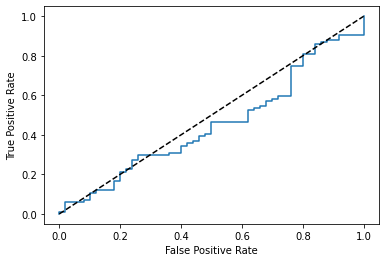

In [1219]:
# Instantiate the classifier
clf = LogisticRegression()

scores, y_pred = predictive_model(clf,X_train,y_train,X_test,y_test)
results['LogisticRegression'] = scores
predictions['LogisticRegression'] = y_pred

Random Forest Classifier

Accuracy: 67%
Precision: 67%
Recall: 93%
AUC: 56%
F1 Score: 78%


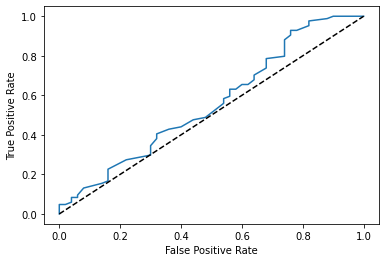

In [1220]:
# Instantiate the classifier
clf = RandomForestClassifier()
scores, y_pred = predictive_model(clf,X_train,y_train,X_test,y_test)
results['RandomForestClassifier'] = scores
predictions['RandomForestClassifier'] = y_pred


Accuracy: 57%
Precision: 64%
Recall: 73%
AUC: 51%
F1 Score: 68%


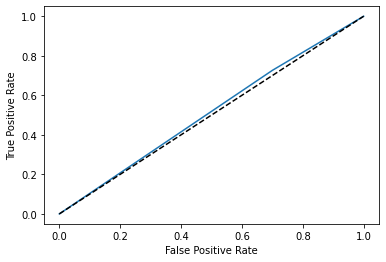

In [1221]:
# Instantiate the classifier
clf = DecisionTreeClassifier()

scores, y_pred = predictive_model(clf,X_train,y_train,X_test,y_test)
results['DecisionTreeClassifier'] = scores
predictions['DecisionTreeClassifier'] = y_pred


In [1222]:
df_results = pd.DataFrame.from_dict(results,columns=['accuracy','precision','recall','auc','f1_score'],orient='index').reset_index().rename(columns={'index':'model'})
df_results

,model,accuracy,precision,recall,auc,f1_score
0,LogisticRegression,0.597015,0.627119,0.880952,0.450952,0.732673
1,RandomForestClassifier,0.671642,0.672414,0.928571,0.558810,0.780000
2,DecisionTreeClassifier,0.567164,0.635417,0.726190,0.513095,0.677778


In [1223]:
df_predictions = pd.DataFrame.from_dict(predictions,orient='columns')
df_predictions = df_predictions.reset_index().rename(columns={'index':'index_test'})
df_predictions.head()

,index_test,LogisticRegression,RandomForestClassifier,DecisionTreeClassifier
0,0,1,1,1
1,1,0,1,1
2,2,0,1,1
3,3,1,1,1
4,4,1,1,1


In [1224]:
x_test_aux = X_test.reset_index().rename(columns={'level_0':'index_test'})[['index','index_test']]
aux = x_test_aux.merge(df_predictions,on='index_test')
predicted_results = aux.merge(matches,on='index')
predicted_results.sort_values(by='Date')

,index,index_test,LogisticRegression,RandomForestClassifier,DecisionTreeClassifier,ATP,Date,Tournament,Winner,Loser,...,Wsets,Lsets,Best of,SeriesPoints,RoundDraw,Type,Year,H2H,QualityWin,Old
26,37,37,1,1,1,13.0,2015-02-17,Delray Beach Open,Rublev A.,Sela D.,...,2.0,1.0,3.0,250,1,Outdoor_Hard,2015.0,Rublev A._Sela D.,1.0,2777
54,38,38,1,1,1,27.0,2015-04-28,Istanbul Open,Rublev A.,Dzumhur D.,...,2.0,0.0,3.0,250,1,Outdoor_Clay,2015.0,Dzumhur D._Rublev A.,2.0,2707
53,75,75,1,1,1,52.0,2015-09-01,US Open,Anderson K.,Rublev A.,...,3.0,1.0,5.0,2000,1,Outdoor_Hard,2015.0,Anderson K._Rublev A.,3.0,2581
4,43,43,1,1,0,60.0,2015-10-20,Kremlin Cup,Kukushkin M.,Rublev A.,...,2.0,0.0,3.0,250,1,Indoor_Hard,2015.0,Kukushkin M._Rublev A.,2.0,2532
21,108,108,0,0,1,64.0,2015-10-28,Valencia Open 500,Rublev A.,Granollers M.,...,2.0,0.0,3.0,500,1,Indoor_Hard,2015.0,Granollers M._Rublev A.,1.0,2524
15,34,34,1,1,1,27.0,2016-04-25,Istanbul Open,Sela D.,Rublev A.,...,2.0,0.0,3.0,250,1,Outdoor_Clay,2016.0,Rublev A._Sela D.,2.0,2344
35,35,35,1,1,1,54.0,2016-09-21,St. Petersburg Open,Rublev A.,Kukushkin M.,...,1.0,0.0,3.0,250,1,Indoor_Hard,2016.0,Kukushkin M._Rublev A.,1.0,2195
30,36,36,1,1,1,55.0,2016-09-28,Chengdu Open,Troicki V.,Ruud C.,...,2.0,0.0,3.0,250,1,Outdoor_Hard,2016.0,Ruud C._Troicki V.,2.0,2188
1,26,26,1,0,0,2.0,2017-01-03,Chennai Open,Olivo R.,Ruud C.,...,2.0,0.0,3.0,250,1,Outdoor_Hard,2017.0,Olivo R._Ruud C.,1.0,2091
32,100,100,1,1,1,15.0,2017-02-20,Rio Open,Ruud C.,Dutra Silva R.,...,2.0,0.0,3.0,500,1,Outdoor_Clay,2017.0,Dutra Silva R._Ruud C.,2.0,2043


In [1225]:
def predictive_model_simple(model,X_train,y_train,X_test,y_test):
    
    # Fit to the training data
    model.fit(X_train,y_train)

    # Compute accuracy
    accuracy = model.score(X_test,y_test)

    # Predict the labels of the test set
    y_pred = model.predict(X_test)


    return y_pred

In [1227]:
tennis_clean[(tennis_clean['H2H'].str.contains(name_p1)) & (tennis_clean['H2H'].str.contains(name_p2))]

,ATP,Date,Tournament,Winner,Loser,WRank,LRank,Wsets,Lsets,Best of,SeriesPoints,RoundDraw,Type,Year,H2H,QualityWin
18714,45,2019-07-24,German Tennis Championships,Rublev A.,Ruud C.,78.0,69.0,2.0,1.0,3,500,2,Outdoor_Clay,2019,Rublev A._Ruud C.,2.0
23898,21,2020-09-26,German Tennis Championships,Rublev A.,Ruud C.,14.0,30.0,2.0,0.0,3,500,6,Outdoor_Clay,2020,Rublev A._Ruud C.,2.0
26189,5,2021-02-15,Australian Open,Rublev A.,Ruud C.,8.0,28.0,2.0,0.0,5,2000,4,Outdoor_Hard,2021,Rublev A._Ruud C.,1.0


In [1228]:
# Instantiate the classifier
clf = RandomForestClassifier()
y_pred = predictive_model_simple(clf,X,y,X_to_predict,y_to_predict)

print(game_to_predict)
print()
if y_pred == 1:
    print(f'{name_p1} is going to WIN the match!')
else:
    print(f'{name_p1} is going to LOSE the match!')


        Date     Winner    Loser  WRank  LRank  SeriesPoints  RoundDraw  \
0 2022-07-24  Rublev A.  Ruud C.     10     12           500          7   

           Type  
0  Outdoor_Clay  

Rublev A. is going to WIN the match!
